# **Space X  Falcon 9 First Stage Landing Prediction**
## Hands on Lab: Complete the Machine Learning Prediction lab

## Objectives
Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data

<hr>

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

**This function is to plot the confusion matrix.**

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe

In [5]:
import requests
import pandas as pd
from io import StringIO

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = requests.get(URL1)
data = resp1.text  # Convertimos la respuesta a texto

# Leemos el CSV desde el texto obtenido
df = pd.read_csv(StringIO(data))
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
data2 = resp2.text  # Convertimos la respuesta a texto

# Leemos el CSV desde el texto obtenido
X = pd.read_csv(StringIO(data2))
X.head(5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1
Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [7]:
# Convertir la columna 'Class' a un array de NumPy y asignarlo a la variable Y
Y = df['Class'].to_numpy()

# Verificar que el resultado es una serie de pandas
print(type(Y))  # Debería ser <class 'numpy.ndarray'>

<class 'numpy.ndarray'>


## TASK  2
Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

Para realizar la Task 2, primero vamos a estandarizar los datos en el dataframe X utilizando el StandardScaler de sklearn.preprocessing. Luego, vamos a dividir los datos en conjuntos de entrenamiento y prueba utilizando train_test_split de sklearn.model_selection. Finalmente, te proporcionaré el código para usar el GridSearchCV para optimizar los hiperparámetros.

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # Puedes usar cualquier modelo que quieras
import numpy as np

# Paso 1: Estandarizar los datos
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)

# Reasignar el resultado estandarizado a la variable X
X = X_scaled

# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Paso 3: Configurar GridSearchCV para buscar los mejores hiperparámetros
# En este caso, utilizamos RandomForestClassifier como ejemplo, puedes cambiar el modelo si es necesario
model = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros que queremos probar
param_grid = {
    'n_estimators': [10, 50, 100],  # Número de árboles
    'max_depth': [5, 10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10]  # Mínimo de muestras necesarias para dividir un nodo
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo usando GridSearchCV
grid_search.fit(X_train, Y_train)

# Mostrar los mejores parámetros y el mejor puntaje
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntaje de validación:", grid_search.best_score_)

# Paso 4: Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, Y_test)
print("Puntaje en el conjunto de prueba:", test_score)


Mejores parámetros encontrados: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 10}
Mejor puntaje de validación: 0.8057142857142857
Puntaje en el conjunto de prueba: 0.9444444444444444


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


Para TASK 3, se requiere dividir los datos en un conjunto de entrenamiento y otro de prueba utilizando train_test_split. El tamaño de la prueba debe ser del 20% (test_size=0.2) y se debe fijar la semilla aleatoria para asegurar que los resultados sean reproducibles (random_state=2). Además, te interesa ver cuántas muestras de prueba (Y_test.shape) tenemos después de la división.

In [10]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verificar el tamaño de Y_test para ver cuántas muestras de prueba tenemos
print("Tamaño de Y_test:", Y_test.shape)


Tamaño de Y_test: (18,)


## TASK  4
Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

Para completar el TASK 4, necesitas crear un objeto de regresión logística y un objeto de GridSearchCV para buscar los mejores hiperparámetros, ajustar el modelo a los datos y mostrar los resultados de la mejor configuración.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Crear el objeto de regresión logística
lr = LogisticRegression()

# Definir el diccionario de parámetros a ajustar
parameters = {
    'C': [0.01, 0.1, 1],  # Parámetros de regularización
    'penalty': ['l2'],     # Tipo de penalización (L2)
    'solver': ['lbfgs']    # Algoritmo de optimización
}

# Crear el objeto GridSearchCV para búsqueda en 10-fold cross-validation
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Ajustar el modelo con los datos de entrenamiento (X_train, Y_train)
logreg_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros encontrados y la precisión en el conjunto de validación
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


## TASK  5
Calculate the accuracy on the test data using the method <code>score</code>:

Para completar el TASK 5, debes calcular la precisión del modelo en los datos de prueba usando el método score, y luego generar y visualizar la matriz de confusión para ver cómo el modelo predice las clases.

Accuracy on test data: 0.8333333333333334


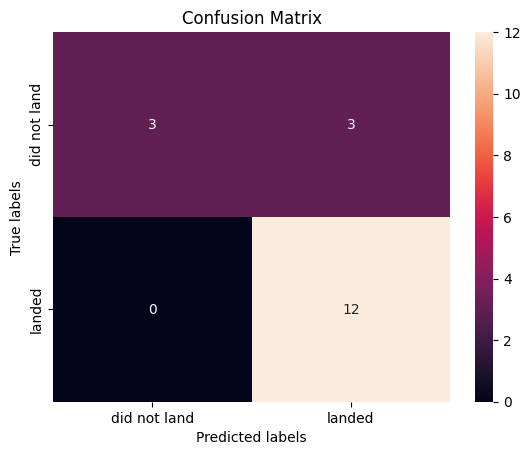

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la precisión en los datos de prueba
accuracy = logreg_cv.score(X_test, Y_test)
print(f"Accuracy on test data: {accuracy}")

# Predecir las clases para los datos de prueba
yhat = logreg_cv.predict(X_test)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')  # annot=True para anotar las celdas
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])  # Etiquetas para las predicciones
    ax.yaxis.set_ticklabels(['did not land', 'landed'])  # Etiquetas para las etiquetas verdaderas
    plt.show()

# Visualizar la matriz de confusión
plot_confusion_matrix(Y_test, yhat)


## TASK  6
Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Para completar TASK 6, debes crear un objeto Support Vector Machine (SVM), luego crear un objeto GridSearchCV para encontrar los mejores parámetros utilizando un conjunto de parámetros específicos. Después de ajustar el modelo con los datos de entrenamiento, se deben imprimir los mejores parámetros encontrados y la precisión del modelo en los datos de validación.

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definir los parámetros para la búsqueda en cuadrícula
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),  # Diferentes valores de C
    'gamma': np.logspace(-3, 3, 5)  # Diferentes valores de gamma
}

# Crear el objeto SVM
svm = SVC()

# Crear el objeto GridSearchCV con validación cruzada de 10 pliegues
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Ajustar el modelo a los datos de entrenamiento
svm_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros encontrados y la precisión en los datos de validación
print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print("Accuracy on validation data: ", svm_cv.best_score_)


Tuned hyperparameters (best parameters):  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Accuracy on validation data:  0.8482142857142856


## TASK  7
Calculate the accuracy on the test data using the method <code>score</code>:

Para completar TASK 7, debes calcular la precisión del modelo SVM en los datos de prueba utilizando el método score y luego generar la matriz de confusión usando la función plot_confusion_matrix que definiste anteriormente.

Accuracy on test data: 0.8333333333333334


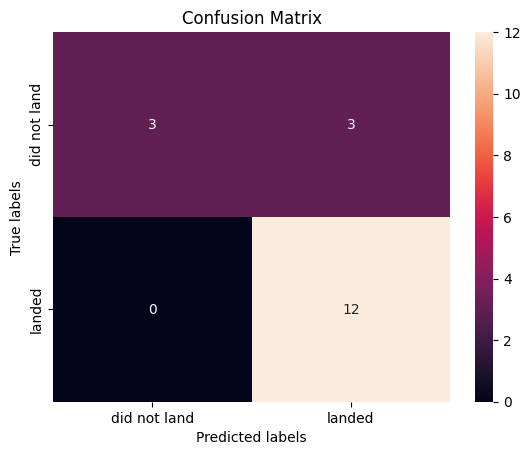

In [16]:
# Calcular la precisión en los datos de prueba usando el método score
accuracy_test = svm_cv.score(X_test, Y_test)

# Imprimir la precisión en los datos de prueba
print(f"Accuracy on test data: {accuracy_test}")

# Realizar predicciones en los datos de prueba
yhat = svm_cv.predict(X_test)

# Plotear la matriz de confusión
plot_confusion_matrix(Y_test, yhat)


## TASK  8
Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

Para completar TASK 8, vamos a crear un objeto de DecisionTreeClassifier, luego un GridSearchCV para encontrar los mejores parámetros usando la validación cruzada. 

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


# Parámetros para el GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Crear el clasificador de árbol de decisión
tree = DecisionTreeClassifier()

# Crear el GridSearchCV
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustar el modelo con el conjunto de datos de entrenamiento
tree_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros encontrados
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)

# Imprimir la mejor precisión obtenida en la validación
print("Accuracy:", tree_cv.best_score_)


Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy: 0.8714285714285713


## TASK  9
Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

Para realizar el TASK 9, primero se debe calcular la precisión (accuracy) del modelo tree_cv utilizando el método .score() sobre el conjunto de prueba (X_test, Y_test). Luego, se puede generar la matriz de confusión utilizando la función plot_confusion_matrix que ya has definido.

Accuracy on test data: 0.8333333333333334


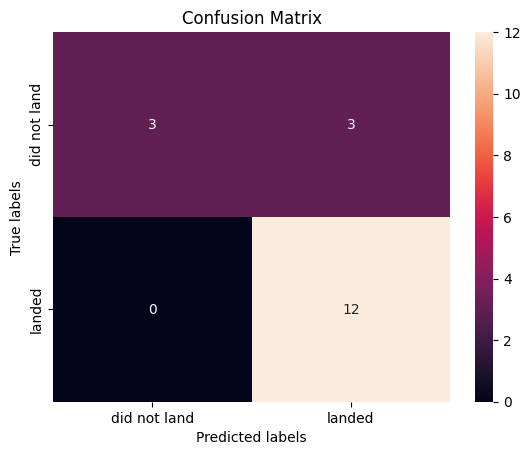

In [19]:
# Calcular la precisión en el conjunto de prueba
accuracy = tree_cv.score(X_test, Y_test)
print(f"Accuracy on test data: {accuracy}")

# Realizar la predicción en el conjunto de prueba
yhat = tree_cv.predict(X_test)

# Graficar la matriz de confusión
plot_confusion_matrix(Y_test, yhat)


## TASK  10
Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

Para realizar TASK 10, vamos a seguir los pasos para crear el modelo de k-Nearest Neighbors (KNN), definir el objeto GridSearchCV para buscar los mejores parámetros, y luego ajustarlo a los datos.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir los parámetros para la búsqueda en grid
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p=1 para Manhattan, p=2 para Euclidean
}

# Crear el objeto KNeighborsClassifier
KNN = KNeighborsClassifier()

# Crear el objeto GridSearchCV con validación cruzada de 10 pliegues
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Ajustar el modelo a los datos de entrenamiento
knn_cv.fit(X_train, Y_train)

# Mostrar los mejores parámetros encontrados
print("Tuned hyperparameters :(best parameters) ", knn_cv.best_params_)

# Mostrar la mejor precisión en los datos de validación
print("Accuracy :", knn_cv.best_score_)


Tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy : 0.8482142857142858


## TASK  11
Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

Para realizar TASK 11, debemos calcular la precisión del modelo k-Nearest Neighbors (KNN) ajustado sobre los datos de prueba utilizando el método score. Además, podemos trazar la matriz de confusión para visualizar el rendimiento del modelo.

Accuracy on test data:  0.8333333333333334


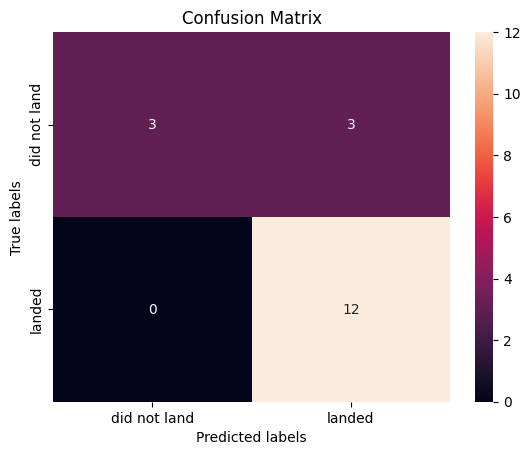

In [24]:
# Calcular la precisión en los datos de prueba utilizando el método score
accuracy = knn_cv.score(X_test, Y_test)

# Mostrar la precisión
print("Accuracy on test data: ", accuracy)

# Realizar las predicciones sobre los datos de prueba
yhat = knn_cv.predict(X_test)

# Traza la matriz de confusión
plot_confusion_matrix(Y_test, yhat)


## TASK  12
Find the method performs best:

Para determinar qué modelo de clasificación tiene el mejor rendimiento, podemos comparar la precisión (accuracy) de todos los modelos entrenados. Para esto, podemos calcular la precisión de cada modelo en el conjunto de prueba (test data) y comparar los resultados.

Pasos para completar TASK 12:

- Calcular la precisión de cada modelo en los datos de prueba.
- Comparar las precisiones obtenidas.
- Visualizar los resultados o simplemente imprimir las precisiones para identificar el mejor modelo.

In [25]:
# Lista para almacenar los modelos y sus precisiones
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracies = []

# Obtener la precisión de cada modelo en el conjunto de prueba
accuracies.append(logreg_cv.score(X_test, Y_test))  # Logreg
accuracies.append(svm_cv.score(X_test, Y_test))  # SVM
accuracies.append(tree_cv.score(X_test, Y_test))  # Decision Tree
accuracies.append(knn_cv.score(X_test, Y_test))  # KNN

# Imprimir las precisiones de cada modelo
for model, accuracy in zip(models, accuracies):
    print(f"{model}: {accuracy:.4f}")

# Identificar el mejor modelo
best_model = models[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy:.4f}")


Logistic Regression: 0.8333
SVM: 0.8333
Decision Tree: 0.8333
KNN: 0.8333

Best Model: Logistic Regression with Accuracy: 0.8333
